# Plots and Figures for miscellaneous stuff

In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torchvision
import torch

import PIL
desktop_path = '/Users/jornelasmunoz/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/'
laptop_path = '/Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/'
if desktop_path in sys.path[0]: sys.path.insert(0, desktop_path + 'lib/'); path = desktop_path
elif laptop_path in sys.path[0]: sys.path.insert(0, laptop_path + 'lib/'); path = laptop_path
# from dataset import MNIST_MURA, FashionMURA
from utils.data import load_data
import MURA as mura

In [6]:
params = {
    "image_size": 23,
    "batch_size": 100,
    "snr": None,
    "dataset": "MNIST",
}

# Load data
train_data, test_data, loaders = load_data(params)

Using the following parameters:
image_size: 23
batch_size: 100
snr: None
dataset: MNIST


In [59]:
p = params["image_size"]
img = train_data.targets[0]
aperture_val = 0.1

<Axes: >

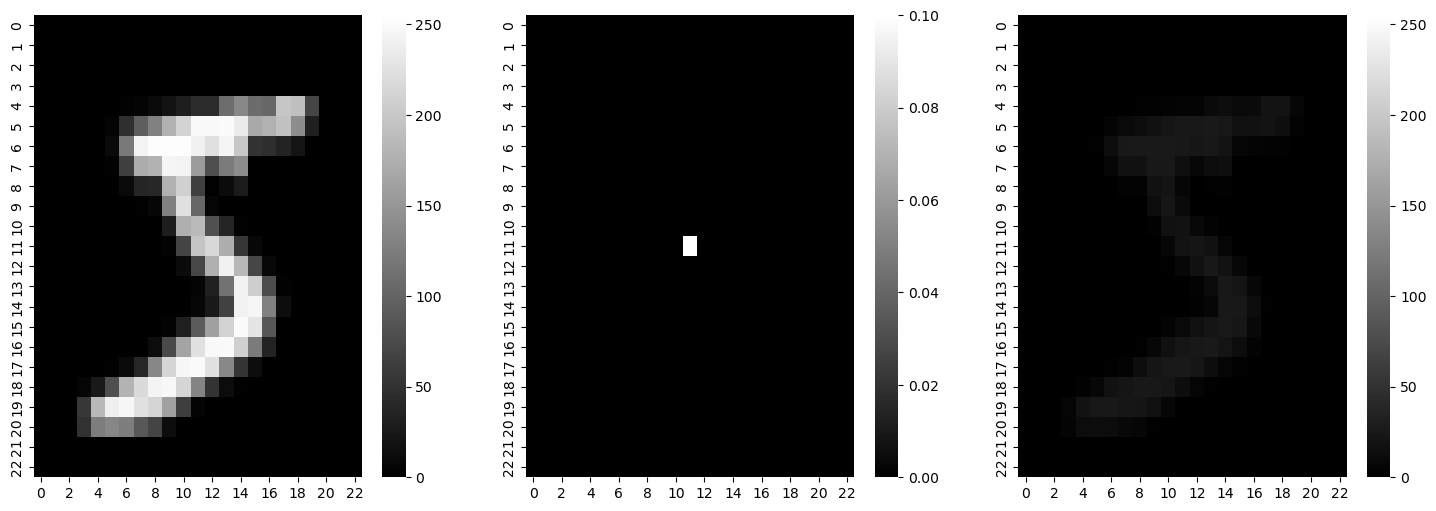

In [60]:

# Create pinhole
pinhole = torch.zeros((p, p))
center = (p-1)//2
pinhole[center, center] = aperture_val
D_pinhole = mura.FFT_convolve(img, pinhole)

fig, axs = plt.subplots(1,3, figsize=(18,6))
axs = axs.ravel()

sns.heatmap(img, cmap='gray', ax=axs[0],vmin=0, vmax= 255)
sns.heatmap(pinhole, cmap='gray', ax=axs[1])
sns.heatmap(D_pinhole, cmap='gray', ax=axs[2], vmin=0, vmax= 255)


<Axes: >

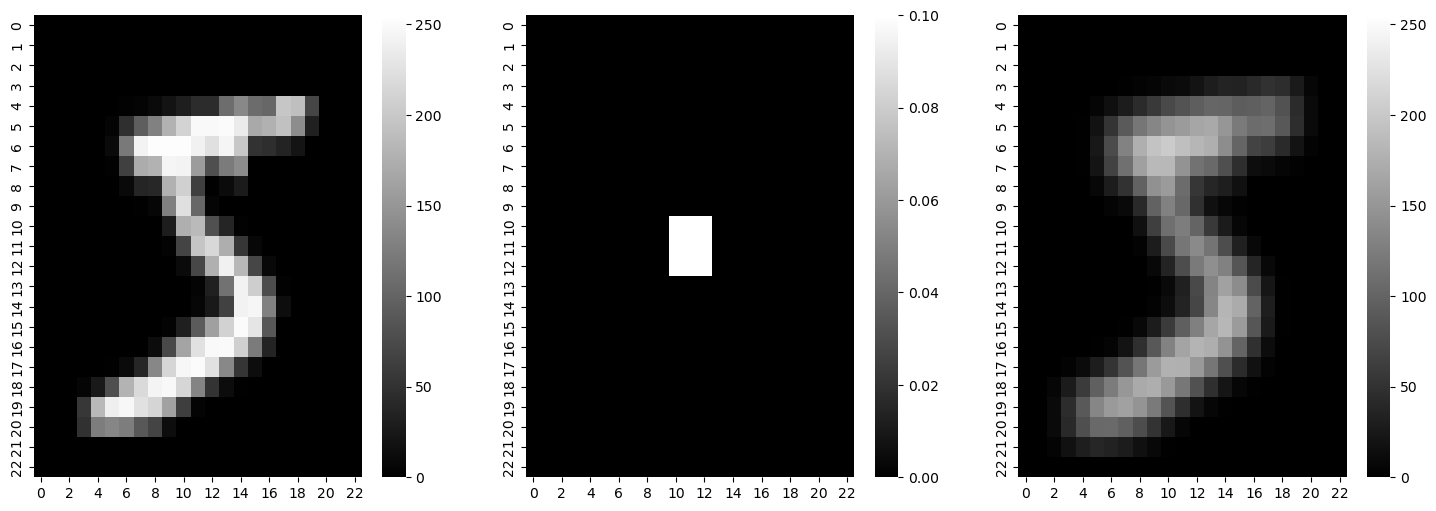

In [61]:
# pinhole with larger diameter
pinhole = torch.zeros((p, p))
center = (p-1)//2
pinhole[center-1:center+2, center-1:center+2] = aperture_val #larger diameter
D_pinhole = mura.FFT_convolve(img, pinhole)

fig, axs = plt.subplots(1,3, figsize=(18,6))
axs = axs.ravel()

sns.heatmap(img, cmap='gray', ax=axs[0],vmin=0, vmax= 255)
sns.heatmap(pinhole, cmap='gray', ax=axs[1])
sns.heatmap(D_pinhole, cmap='gray', ax=axs[2], vmin=0, vmax= 255)

<Axes: >

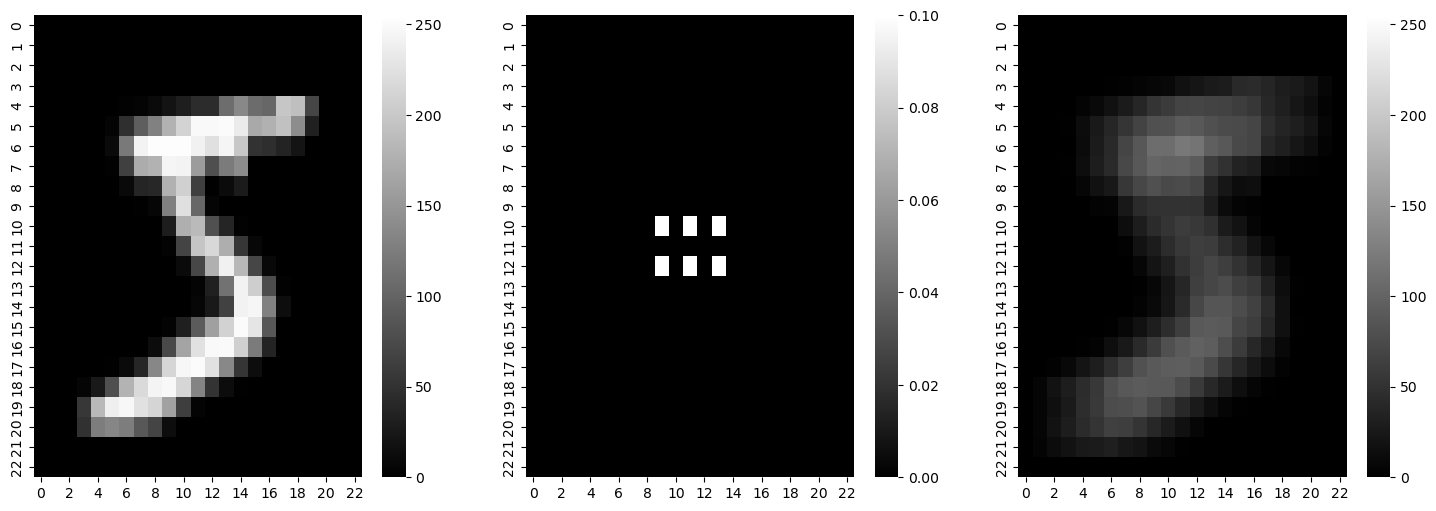

In [62]:
# Multiple pinholes
pinhole = torch.zeros((p, p))
center = (p-1)//2
multiple_pn = [[1,0,1,0,1], [0,0,0,0,0],[1,0,1,0,1]]
pinhole[center-1:center+2, center-2:center+3] += np.multiply(aperture_val, multiple_pn)

D_pinhole = mura.FFT_convolve(img, pinhole)

fig, axs = plt.subplots(1,3, figsize=(18,6))
axs = axs.ravel()

sns.heatmap(img, cmap='gray', ax=axs[0],vmin=0, vmax= 255)
sns.heatmap(pinhole, cmap='gray', ax=axs[1])
sns.heatmap(D_pinhole, cmap='gray', ax=axs[2], vmin=0, vmax= 255)